### Recurrent Neural Network (RNN)

The MLP (feedforward network) is not known to do well on sequential events model such as probabilistic language model of predicting the next word based on previous word at every given point. RNN architecture addresses this issue. It is similar to MLP except that they have a feedback loop, which means they feed previous time steps into the current step. This type of architecture generates sequences to simulate situation and create synthetic data, making them the ideal modeling choice to work on sequence data such as speech text mining, image captioning, time series prediction, robot control, language modeling etc. 

The previous step’s hidden layer and final outputs are fed back into the network and will be used as input to the next steps hidden layer which means the network will remember the past and it will repeatedly predict what will happen next. The drawback in the general RNN architecture is that it can be memory heavy, and hard to train for long term temporal dependency (i.e., context of long text should be known at any given stage). 

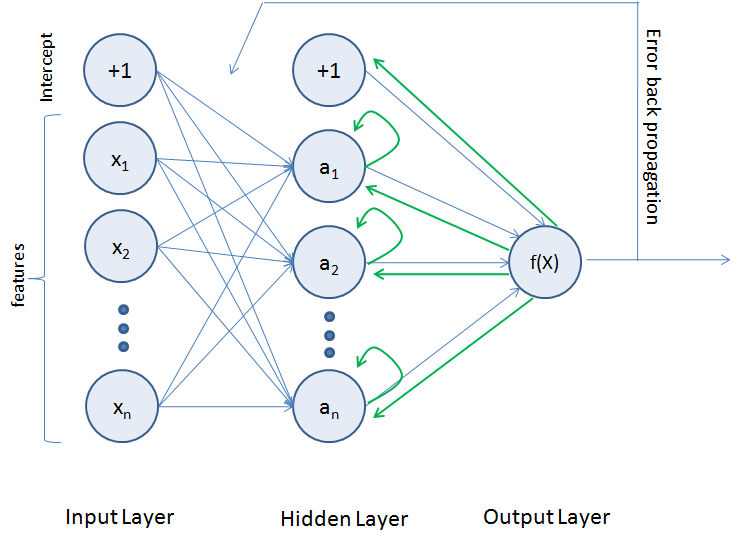

In [6]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/RNN.png', width=600)

### Long Short Term Memory (LSTM)

LSTM is an implementation of improved RNN architecture to address the issues of general RNN, and it enables long range dependencies. It is designed to have better memory through linear memory cells surrounded by set of gate units used to control the flow of information, when information should enter the memory, when to forget and when to output. It uses no activation function within its recurrent components, thus the gradient term does not vanish with backpropagation. Figure x below gives a comparison of simple multilayer perceptron vs RNN vs LSTM.

We'll use the IMDB dataset which has labeled sentiment (positive/negative) for movie reviews. The reviews have been preprocessed, and encoded as sequence of word indexes.  

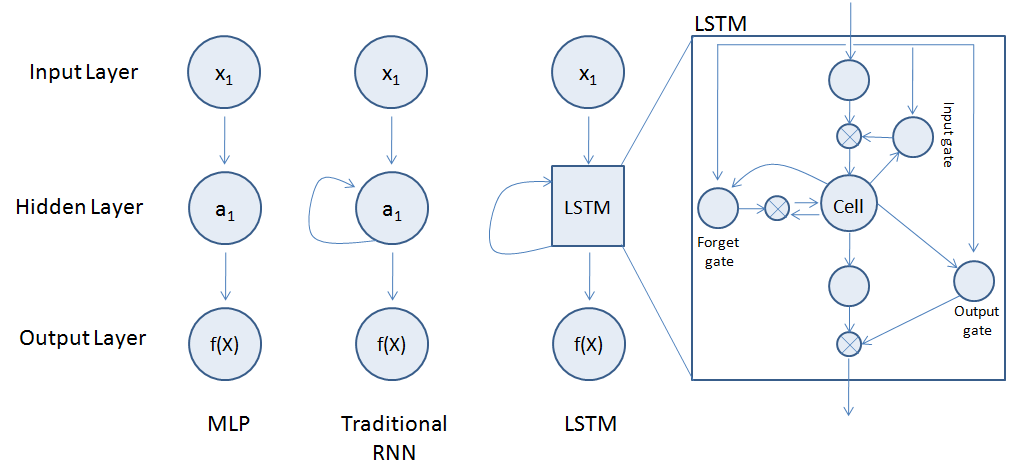

In [8]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/LSTM.png', width=700)

In [9]:
import numpy as np
np.random.seed(2017)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


### Load data

In [10]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
(25000, 'train sequences')
(25000, 'test sequences')
Pad sequences (samples x time)
('X_train shape:', (25000, 80))
('X_test shape:', (25000, 80))


### Model Config

In [11]:
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train

In [12]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=5, validation_data=(X_test, y_test))

/home/manohar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 328s - loss: 0.5293 - acc: 0.7332 - val_loss: 0.4101 - val_acc: 0.8206
Epoch 2/5
25000/25000 [==============================] - 305s - loss: 0.3805 - acc: 0.8354 - val_loss: 0.3814 - val_acc: 0.8297
Epoch 3/5
25000/25000 [==============================] - 611s - loss: 0.3024 - acc: 0.8746 - val_loss: 0.4037 - val_acc: 0.8343
Epoch 4/5
25000/25000 [==============================] - 352s - loss: 0.2454 - acc: 0.9016 - val_loss: 0.4397 - val_acc: 0.8304
Epoch 5/5
25000/25000 [==============================] - 99s    
Test score: 0.417513472309
Test accuracy: 0.83424


### Evaluate

In [14]:
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print 'Train score:', train_score
print 'Train accuracy:', train_acc

print 'Test score:', test_score
print 'Test accuracy:', test_acc

25000/25000 [==============================] - 83s    
Train score: 0.0930857129323
Train accuracy: 0.97228
Test score: 0.417513472309
Test accuracy: 0.83424
